/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.10176427666234
Test MSE: 5.171302303567198


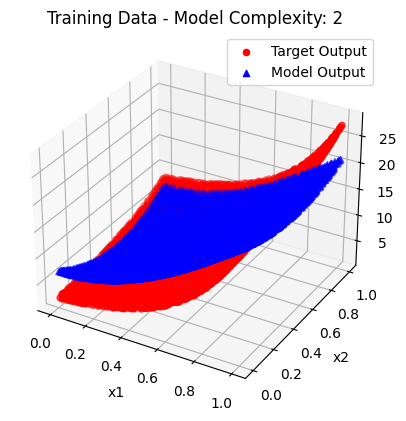

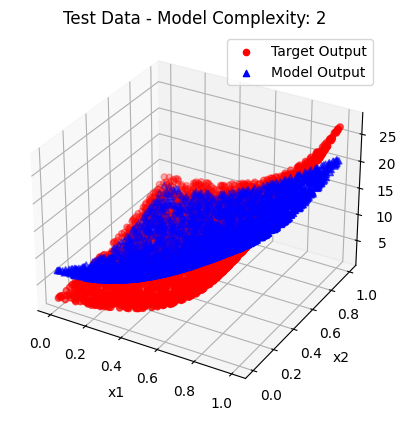

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.3470334049552612
Test MSE: 1.3883688072562037


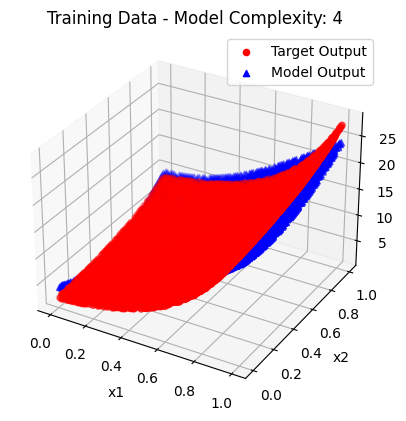

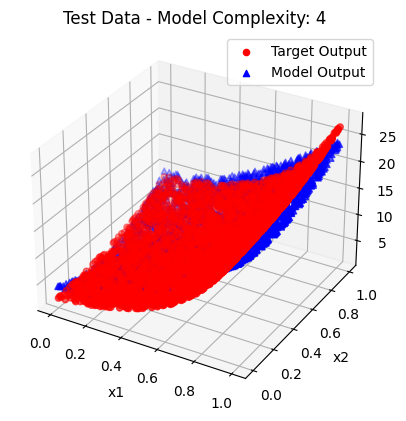

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3824329169019973
Test MSE: 0.37922477013590616


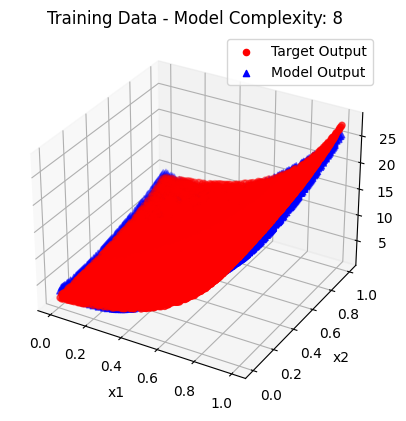

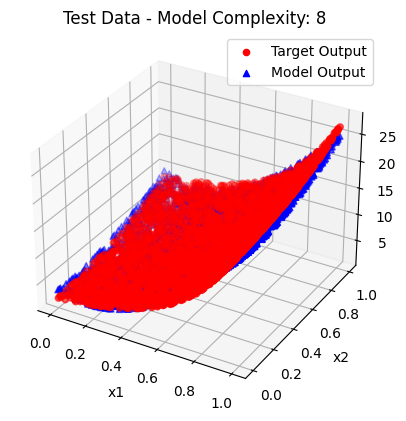

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.0039954892443923905
Test MSE: 0.0038816109372069967


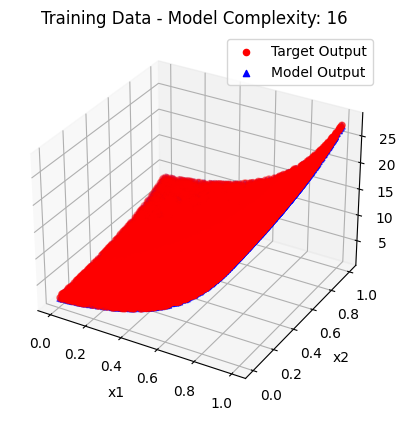

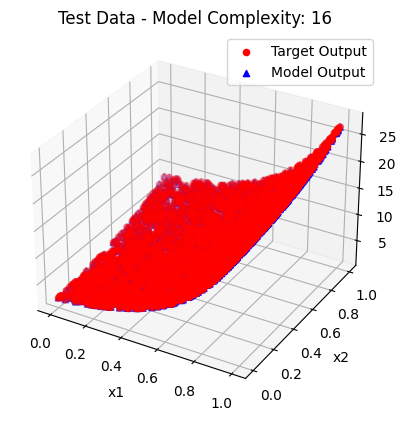

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.0030961202396939196
Test MSE: 0.0030277389802893418


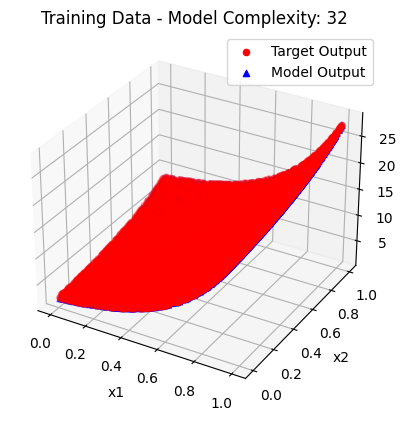

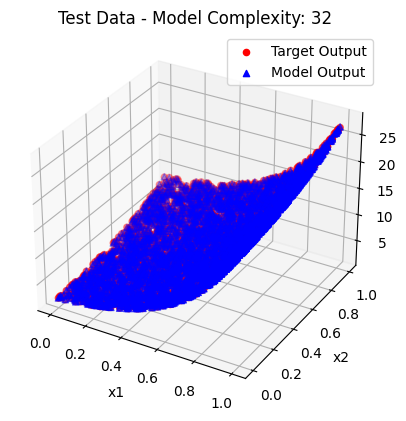

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.003098422110846814
Test MSE: 0.0030830889275630055


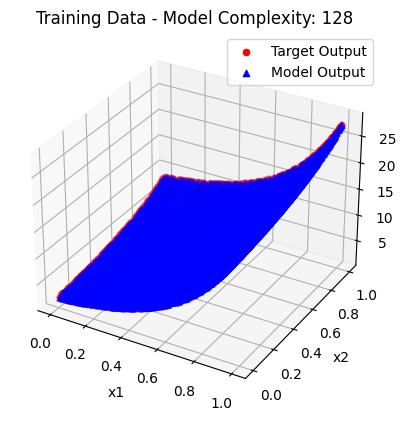

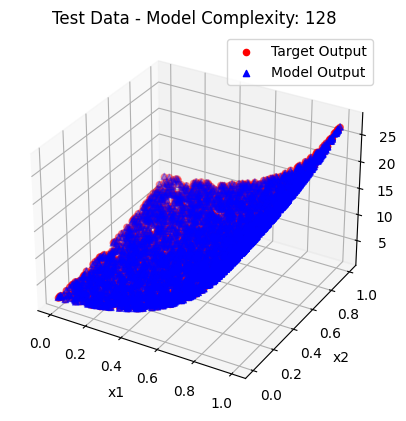

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.003111349233523265
Test MSE: 0.003086164110401848


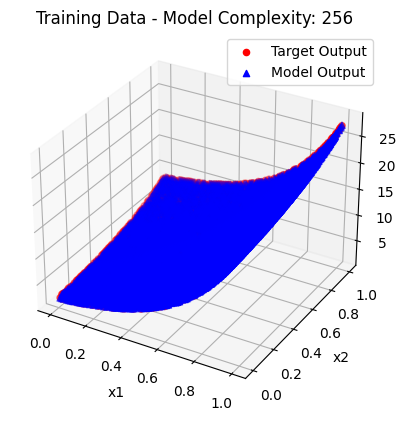

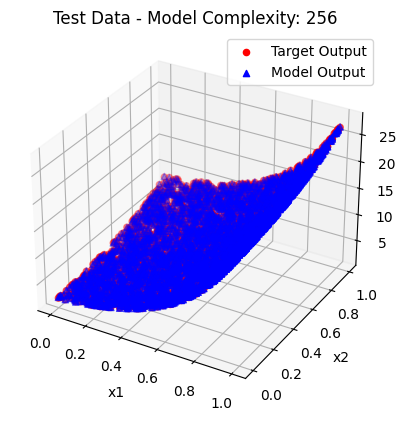

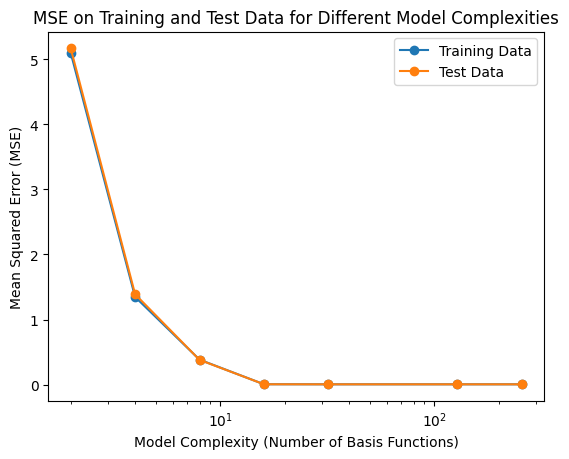

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Load your CSV file (replace 'your_file.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/Regression/BivariateData/13.csv', header=None, names=['x1', 'x2', 'y'])

# Split the data into training and test sets (70:30 ratio)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Extract features and target variable
X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
X_test = test_data[['x1', 'x2']]
y_test = test_data['y']

# Function to create Gaussian basis functions
def gaussian_basis_functions(data, centers, sigma):
    return np.exp(-np.linalg.norm(data - centers, axis=1)**2 / (2 * sigma**2))

# Number of basis functions for different model complexities
model_complexities = [2, 4, 8, 16, 32, 128, 256]

# Plot arrays to store MSE values for training and test data
mse_train_values = []
mse_test_values = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train linear regression model
    model = LinearRegression()
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Append MSE values to the plot arrays
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity}')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity}')
    plt.show()

# Plot MSE values for different model complexities
plt.plot(model_complexities, mse_train_values, marker='o', label='Training Data')
plt.plot(model_complexities, mse_test_values, marker='o', label='Test Data')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities')
plt.show()


# Regularized

### alpha = 0.001

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.101764285891277
Test MSE: 5.171318601140942


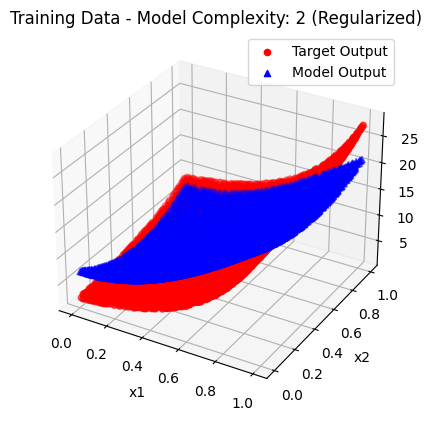

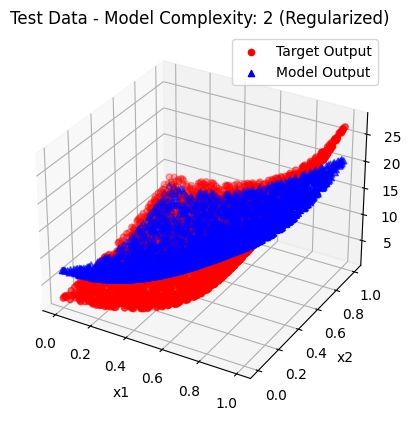

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.347033408542233
Test MSE: 1.3883711318747385


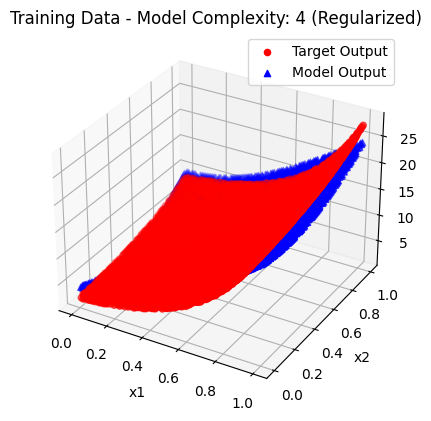

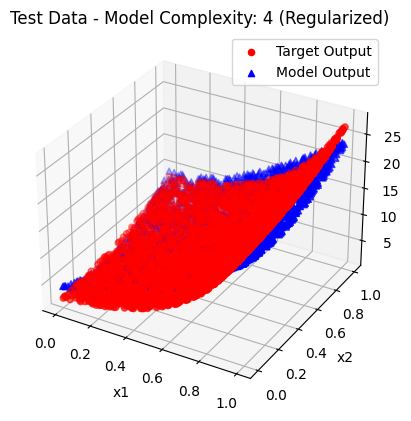

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.39837485189052224
Test MSE: 0.3950255108930377


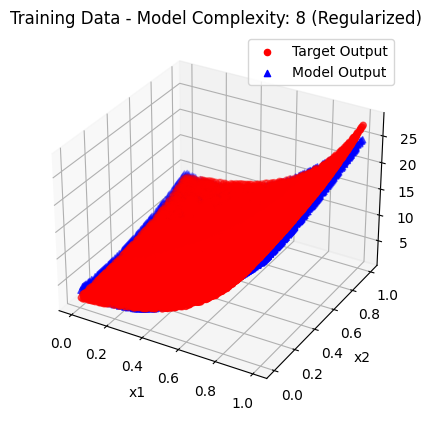

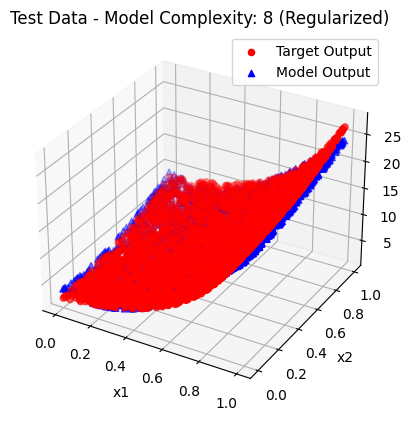

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3215957373365837
Test MSE: 0.3190618836709355


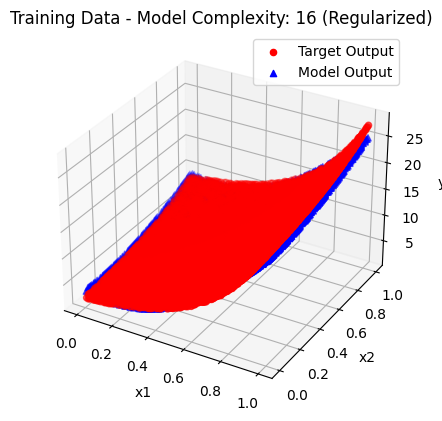

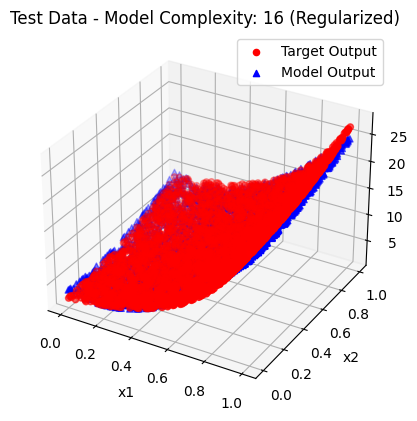

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.20928802596565158
Test MSE: 0.20818635517860312


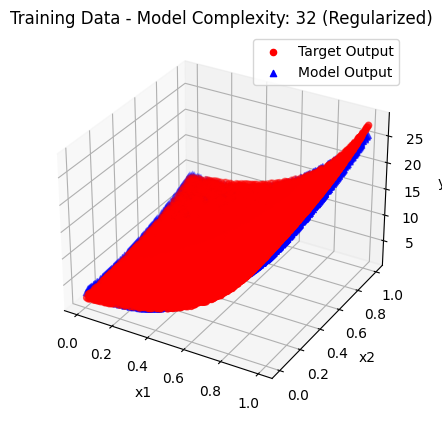

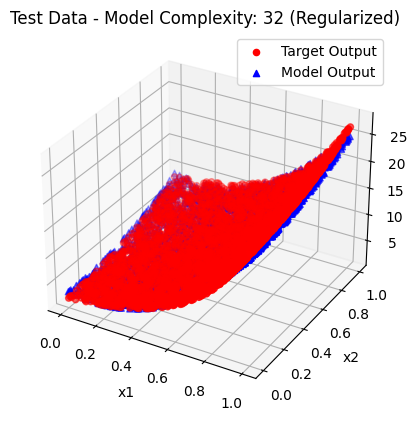

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.05052369465696343
Test MSE: 0.05060757403339335


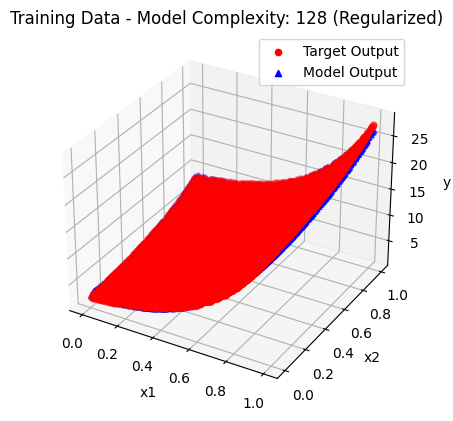

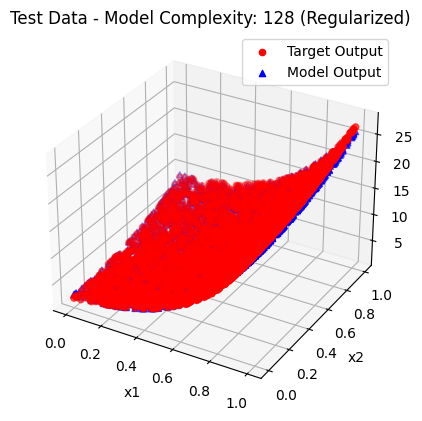

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.02606069877854254
Test MSE: 0.026033703982240003


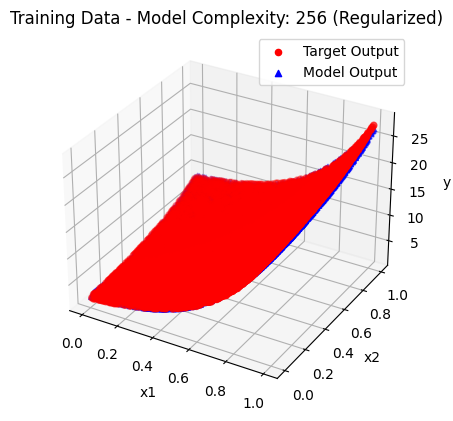

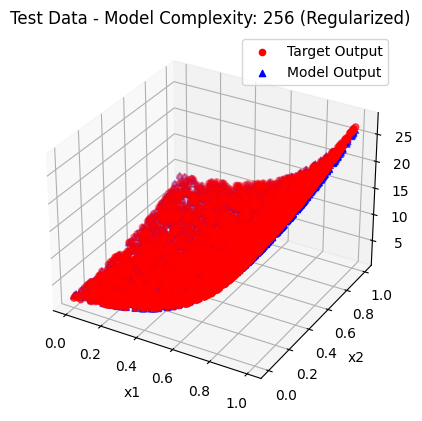

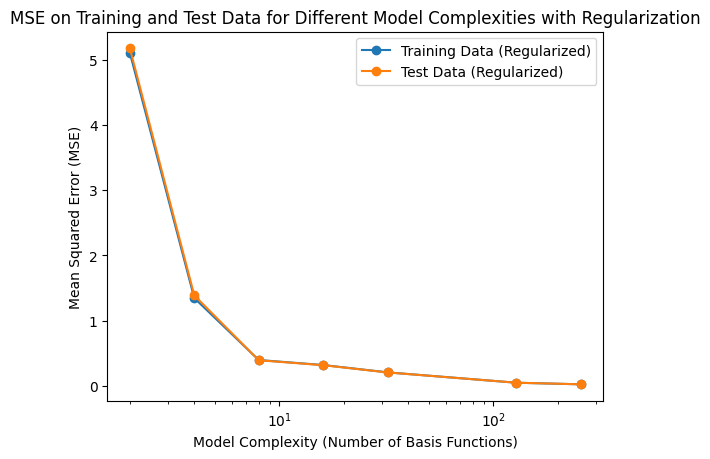

In [ ]:
from sklearn.linear_model import Ridge

# Regularization parameter (adjust as needed)
alpha = 0.001

# Arrays to store MSE values for training and test data with regularization
mse_train_values_reg = []
mse_test_values_reg = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to the plot arrays
    mse_train_values_reg.append(mse_train)
    mse_test_values_reg.append(mse_test)


    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

# Plot MSE values for different model complexities with regularization
plt.plot(model_complexities, mse_train_values_reg, marker='o', label='Training Data (Regularized)')
plt.plot(model_complexities, mse_test_values_reg, marker='o', label='Test Data (Regularized)')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities with Regularization')
plt.show()




### alpha=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.101765199200148
Test MSE: 5.171466069314471


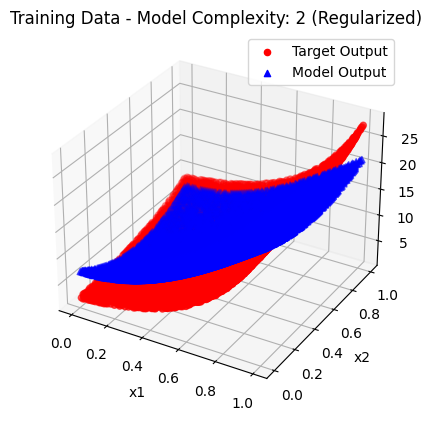

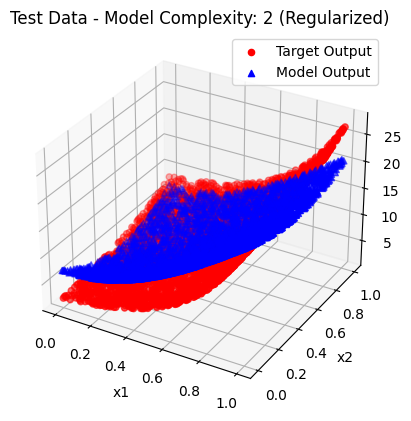

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.347033761784911
Test MSE: 1.3883925680285372


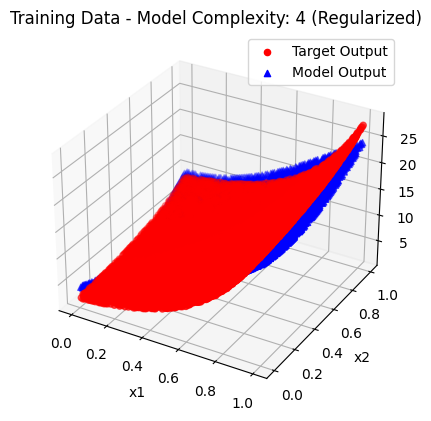

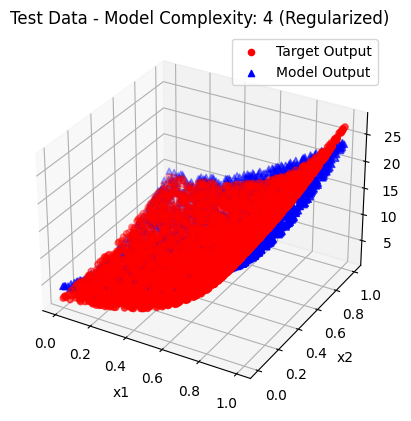

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.43222761901968043
Test MSE: 0.43045010357310354


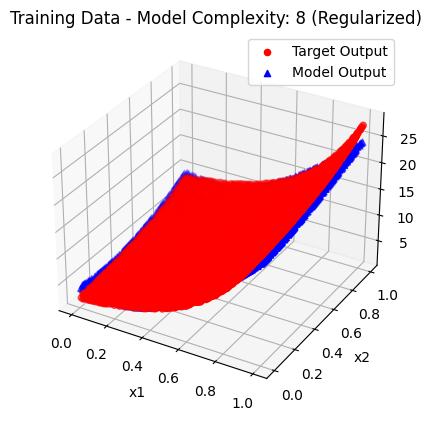

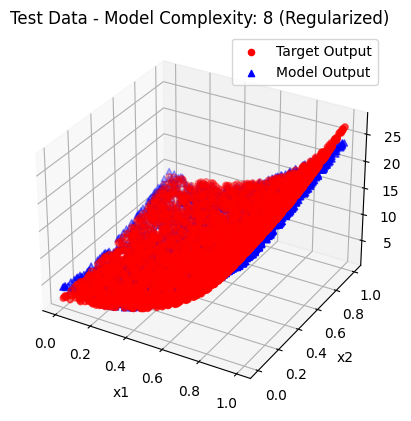

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.41025993634130936
Test MSE: 0.4071137582217673


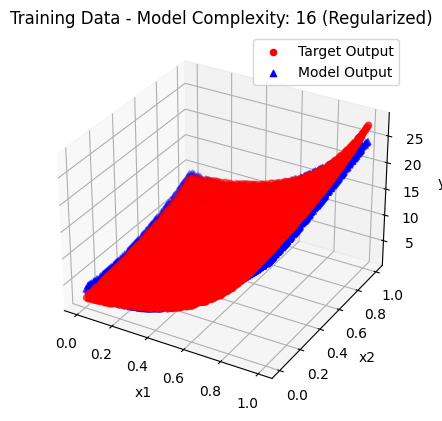

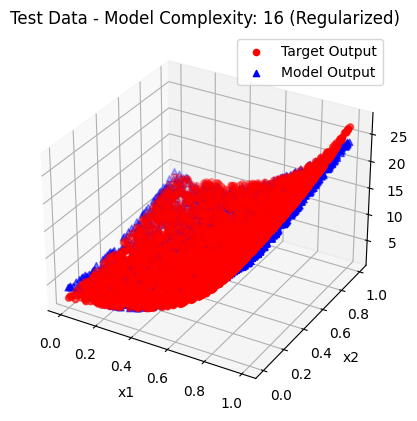

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3825437352616879
Test MSE: 0.3795129493106525


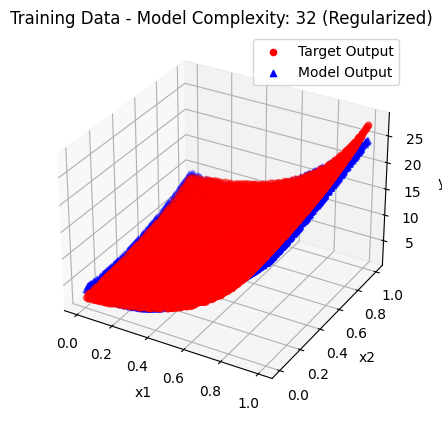

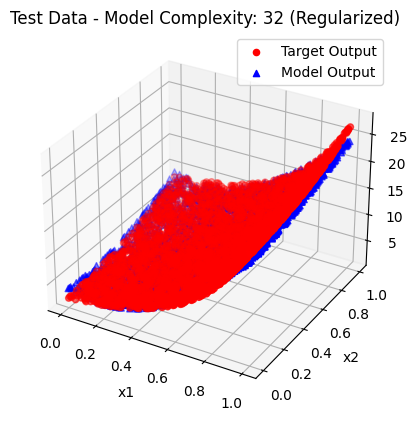

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.2710238329708537
Test MSE: 0.2691876663921759


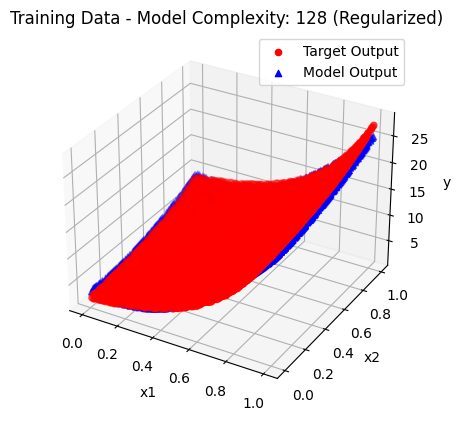

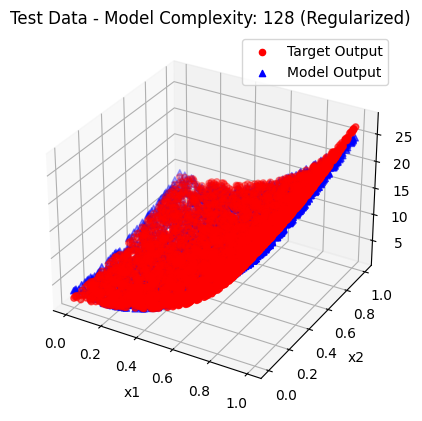

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.192964352900588
Test MSE: 0.19208283745081817


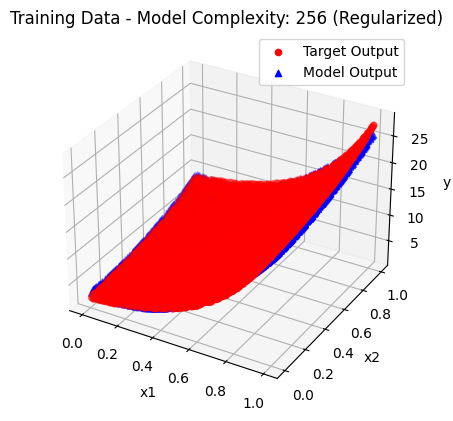

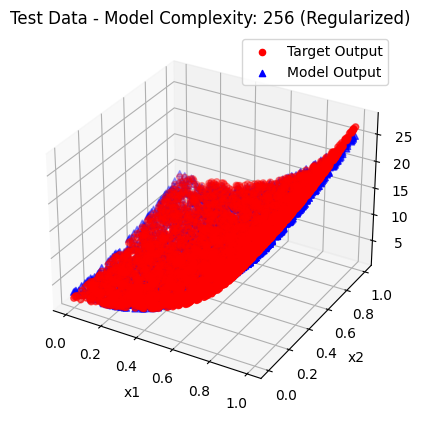

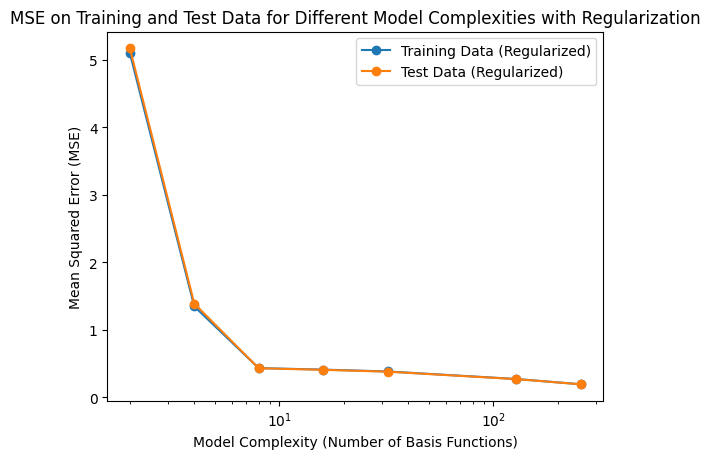

In [ ]:
from sklearn.linear_model import Ridge

# Regularization parameter (adjust as needed)
alpha = 0.01

# Arrays to store MSE values for training and test data with regularization
mse_train_values_reg = []
mse_test_values_reg = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to the plot arrays
    mse_train_values_reg.append(mse_train)
    mse_test_values_reg.append(mse_test)


    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

# Plot MSE values for different model complexities with regularization
plt.plot(model_complexities, mse_train_values_reg, marker='o', label='Training Data (Regularized)')
plt.plot(model_complexities, mse_test_values_reg, marker='o', label='Test Data (Regularized)')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities with Regularization')
plt.show()




### alpha=0.05

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.101787300650046
Test MSE: 5.172138650479512


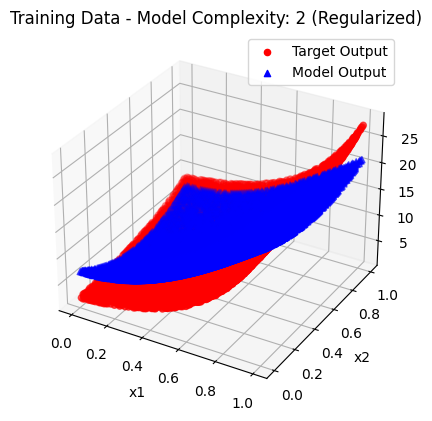

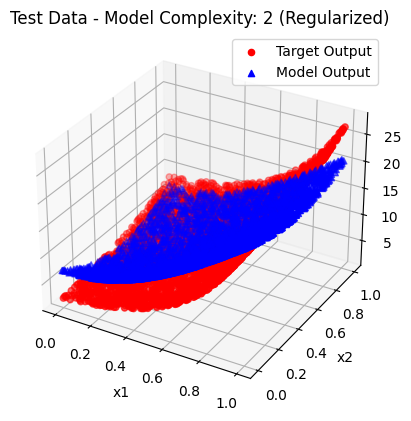

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.3470421420123084
Test MSE: 1.3884985140945902


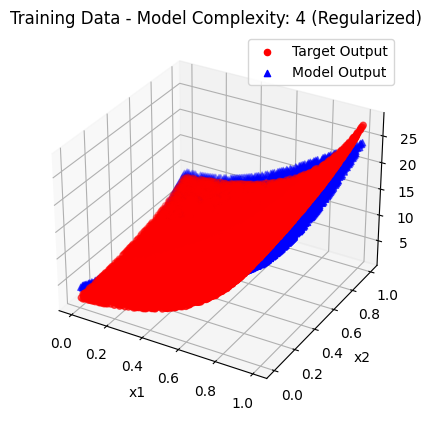

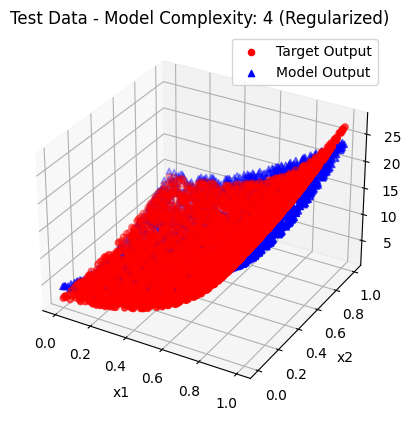

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.5289669673777259
Test MSE: 0.5344646843585384


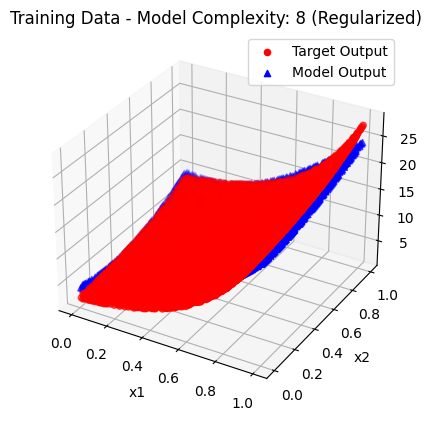

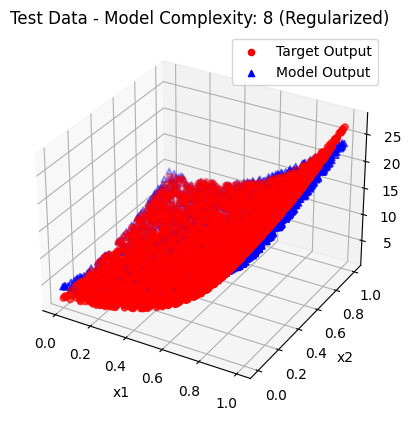

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.43498767578802705
Test MSE: 0.4333983399071141


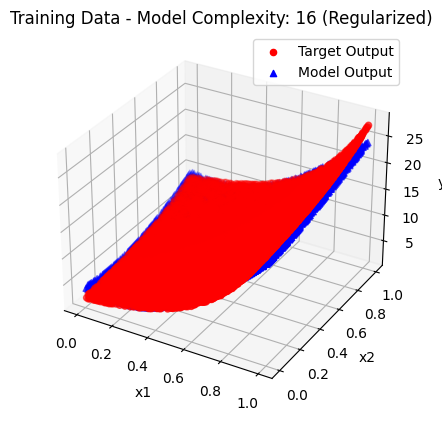

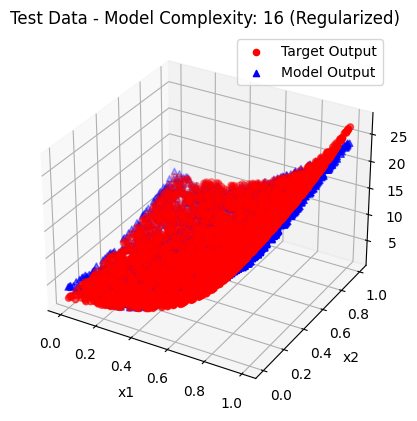

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.4203838157536113
Test MSE: 0.41764531933827986


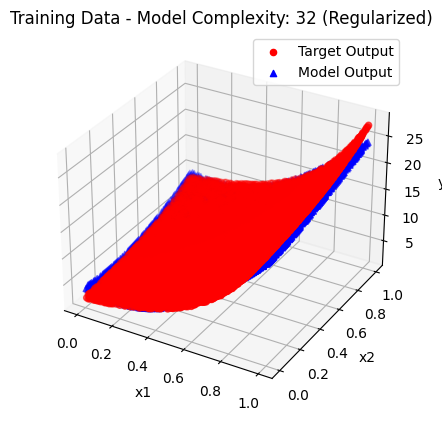

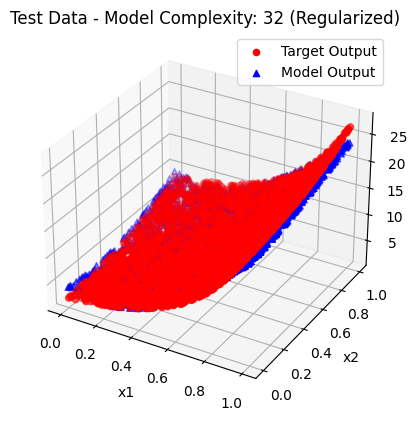

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3770622353262695
Test MSE: 0.3740673646098471


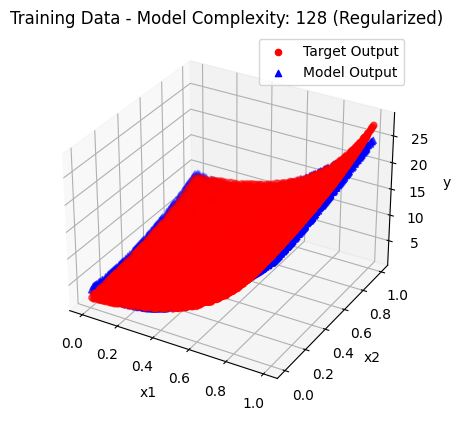

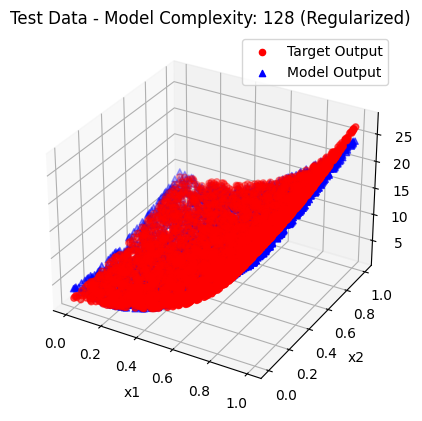

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3406372831075563
Test MSE: 0.33807410830739043


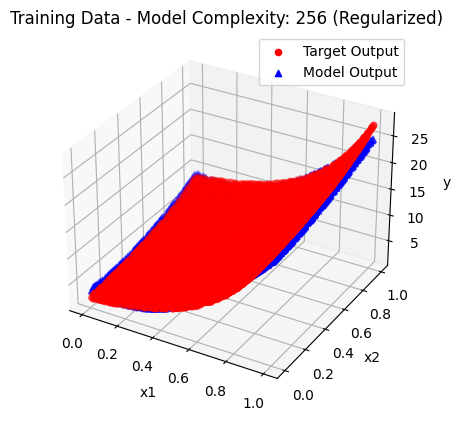

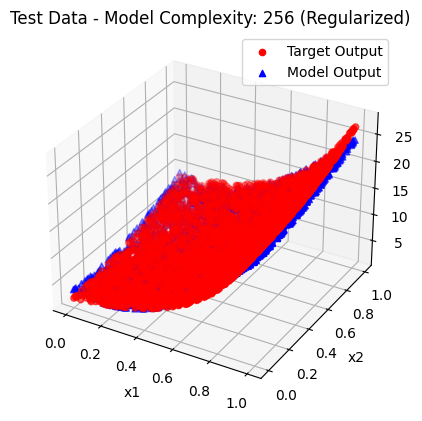

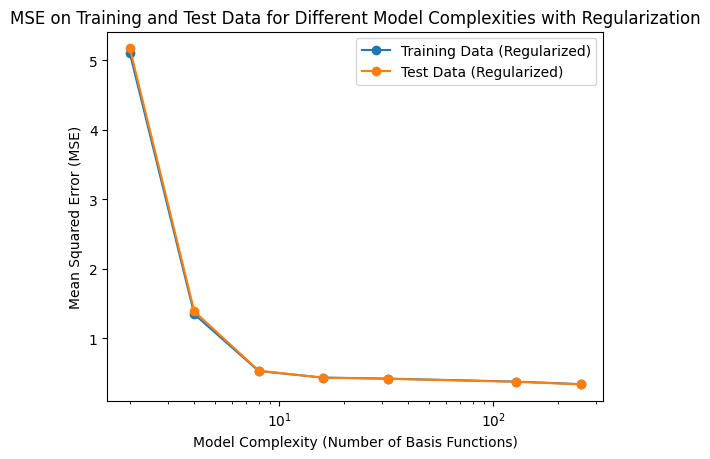

In [ ]:
from sklearn.linear_model import Ridge

# Regularization parameter (adjust as needed)
alpha = 0.05

# Arrays to store MSE values for training and test data with regularization
mse_train_values_reg = []
mse_test_values_reg = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to the plot arrays
    mse_train_values_reg.append(mse_train)
    mse_test_values_reg.append(mse_test)


    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

# Plot MSE values for different model complexities with regularization
plt.plot(model_complexities, mse_train_values_reg, marker='o', label='Training Data (Regularized)')
plt.plot(model_complexities, mse_test_values_reg, marker='o', label='Test Data (Regularized)')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities with Regularization')
plt.show()


### alpha = 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.101856175958097
Test MSE: 5.173018620800998


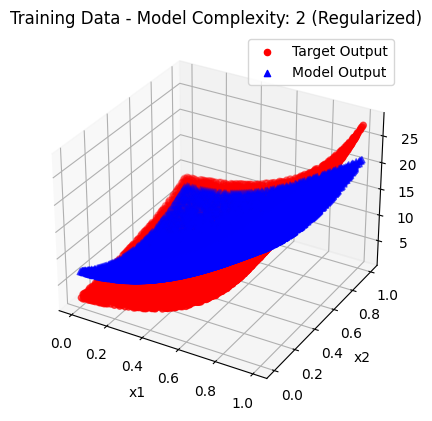

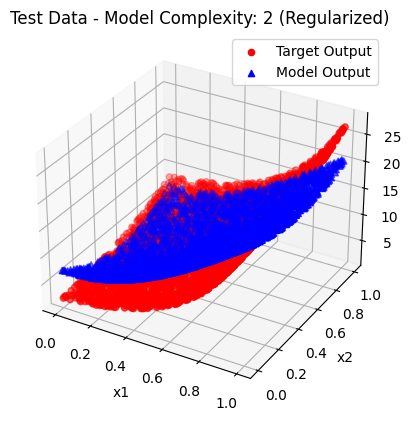

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.347067610714182
Test MSE: 1.3886534524925858


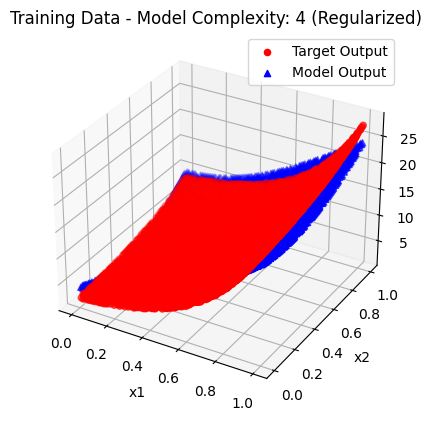

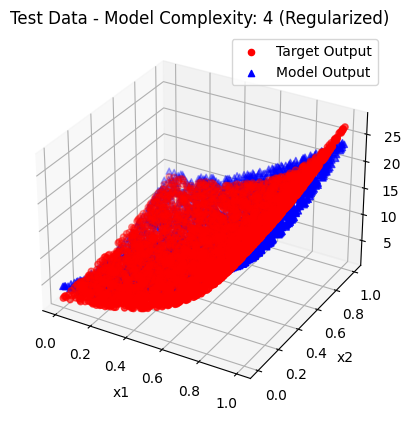

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.6538557537540238
Test MSE: 0.6661888053443592


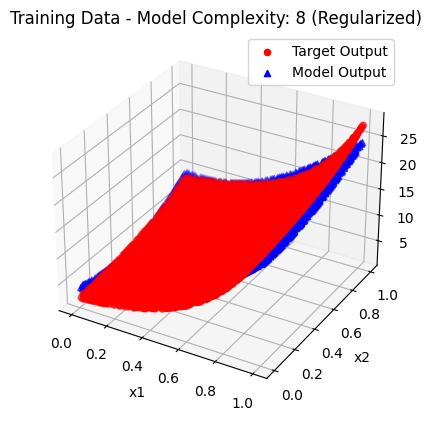

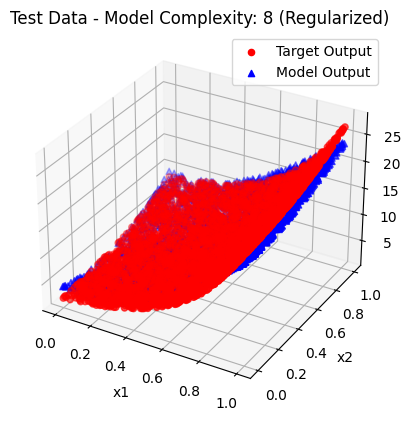

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.4571219095748012
Test MSE: 0.45763676351724697


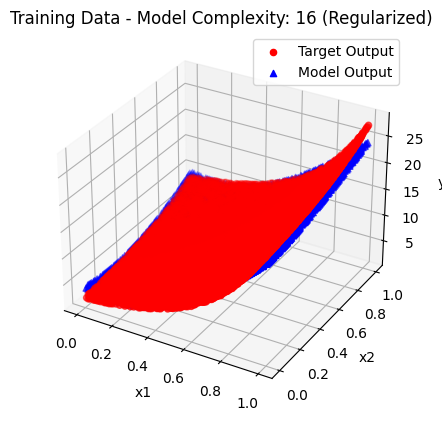

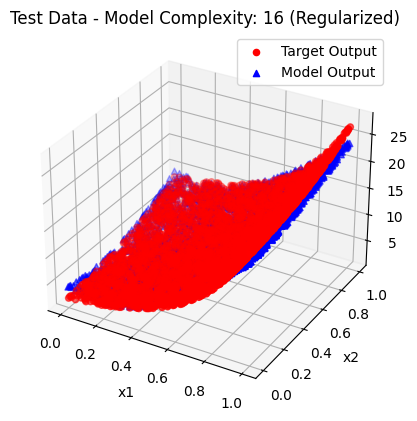

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.4310356885411023
Test MSE: 0.42914177559476


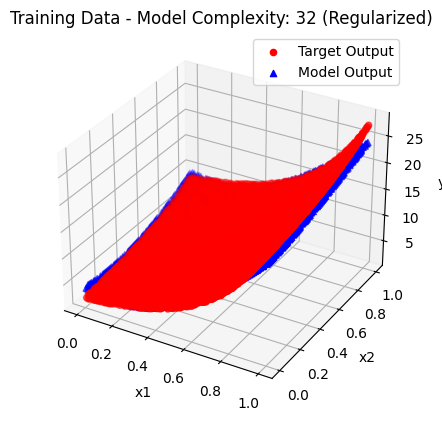

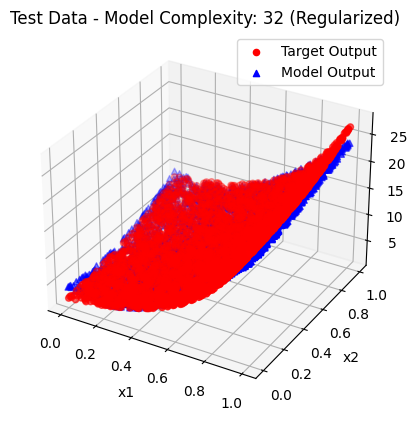

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.3996071476224473
Test MSE: 0.3965509755951595


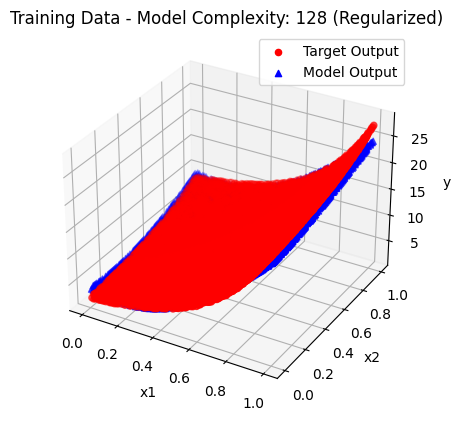

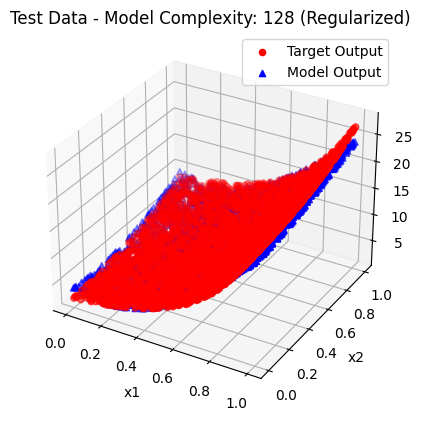

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.37576767331178856
Test MSE: 0.3728657086586954


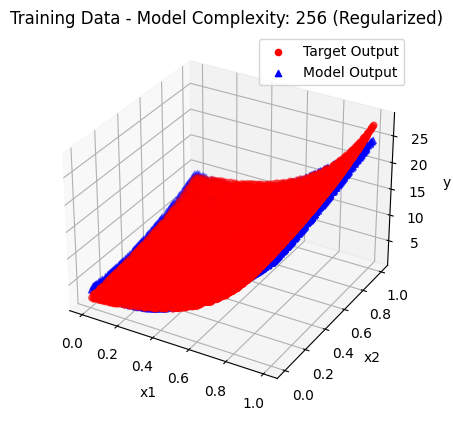

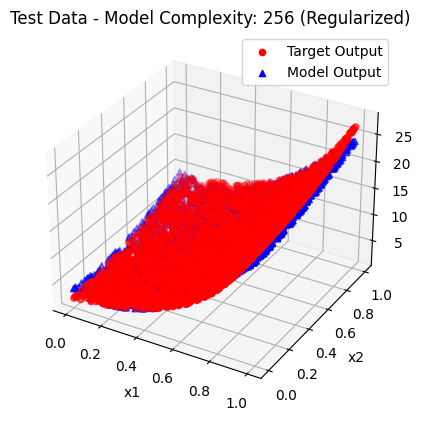

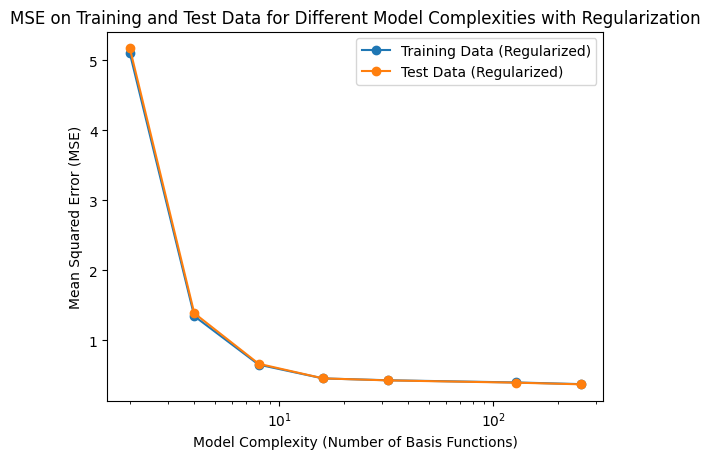

In [ ]:
from sklearn.linear_model import Ridge

# Regularization parameter (adjust as needed)
alpha = 0.1

# Arrays to store MSE values for training and test data with regularization
mse_train_values_reg = []
mse_test_values_reg = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to the plot arrays
    mse_train_values_reg.append(mse_train)
    mse_test_values_reg.append(mse_test)


    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

# Plot MSE values for different model complexities with regularization
plt.plot(model_complexities, mse_train_values_reg, marker='o', label='Training Data (Regularized)')
plt.plot(model_complexities, mse_test_values_reg, marker='o', label='Test Data (Regularized)')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities with Regularization')
plt.show()


### alpha = 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  5.110611835540768
Test MSE: 5.196002102220602


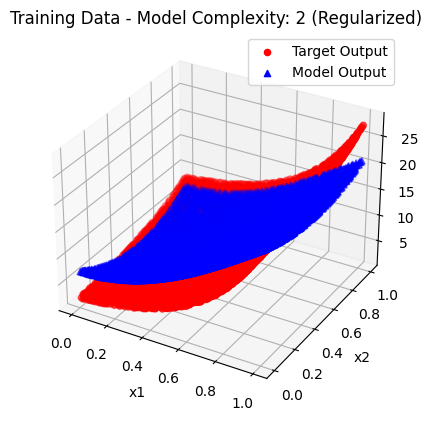

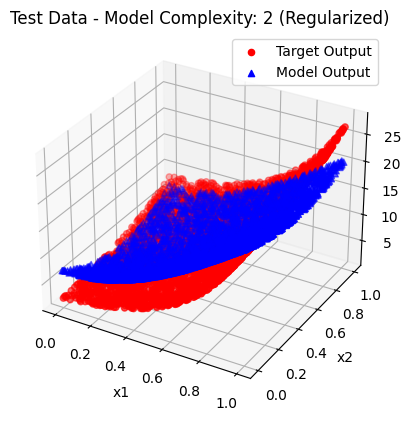

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.3500548788728048
Test MSE: 1.3944745449943363


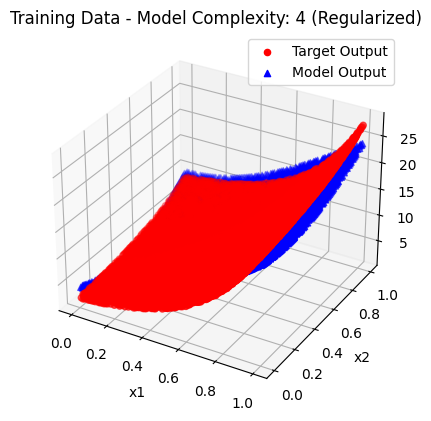

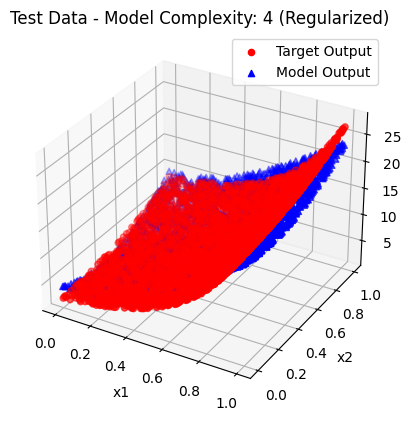

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  1.1819836230055292
Test MSE: 1.2184387837717072


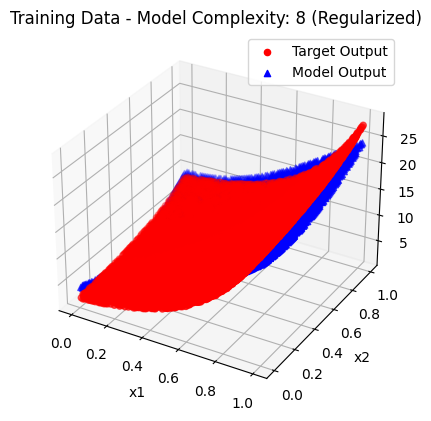

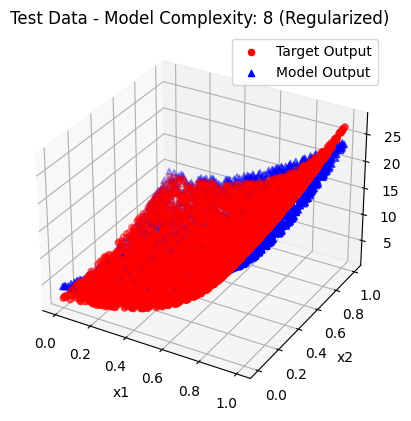

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.8523299799829727
Test MSE: 0.8739317169690088


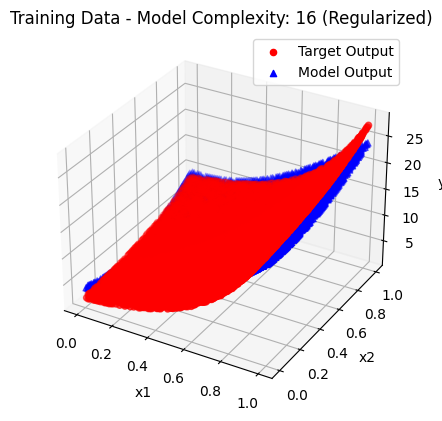

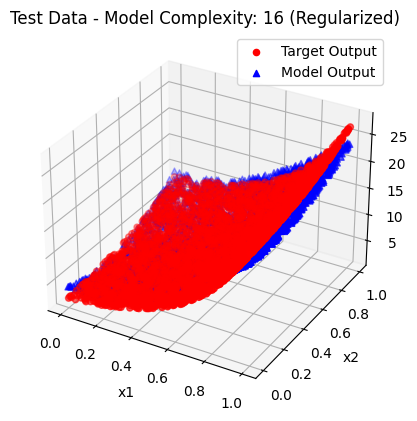

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.6349707624387956
Test MSE: 0.6463744570355169


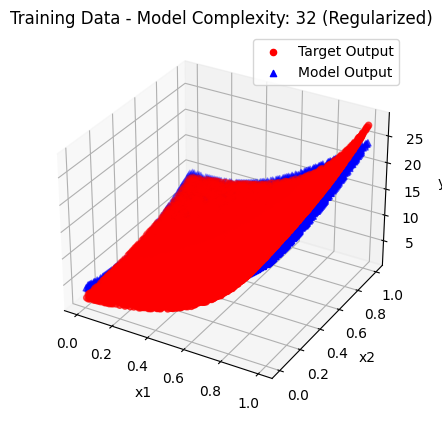

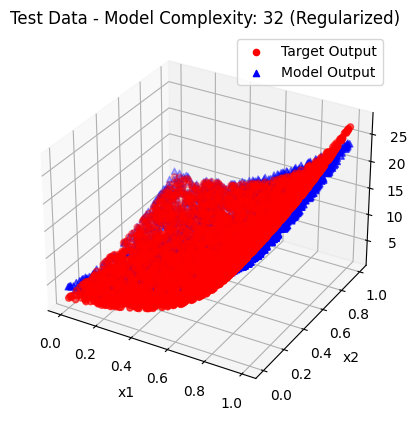

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.45230482714915404
Test MSE: 0.4526455677308174


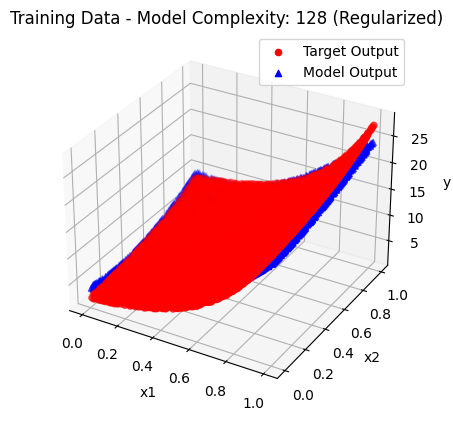

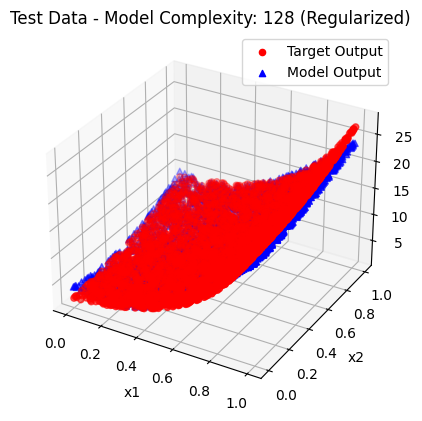

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train MSE:  0.4300439331702928
Test MSE: 0.42835069024649547


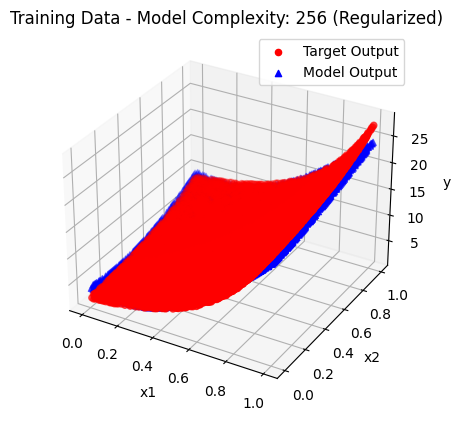

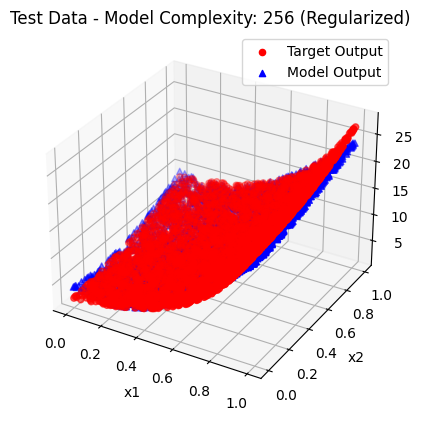

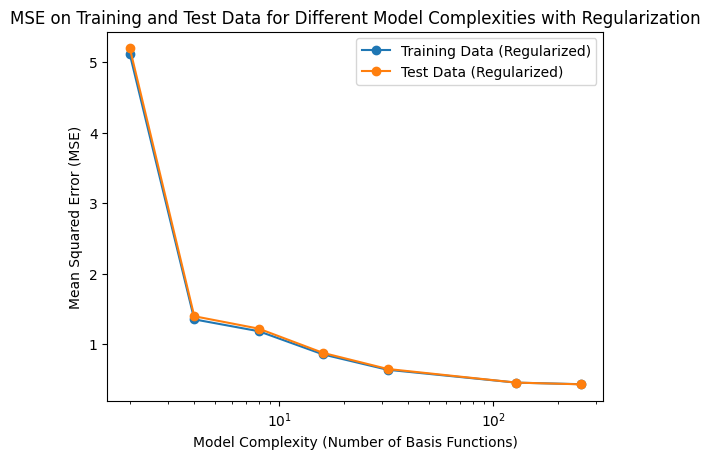

In [ ]:
from sklearn.linear_model import Ridge

# Regularization parameter (adjust as needed)
alpha = 1

# Arrays to store MSE values for training and test data with regularization
mse_train_values_reg = []
mse_test_values_reg = []

# Loop through different model complexities
for complexity in model_complexities:
    # Apply K-means clustering to find centers
    kmeans = KMeans(n_clusters=complexity, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Create design matrix using Gaussian basis functions
    phi_train = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_train.values])
    phi_test = np.array([gaussian_basis_functions(x, centers, sigma=1.0) for x in X_test.values])

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(phi_train, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(phi_train)
    y_test_pred = model.predict(phi_test)

    # Calculate MSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to the plot arrays
    mse_train_values_reg.append(mse_train)
    mse_test_values_reg.append(mse_test)


    print("Train MSE: ", mse_train)
    print("Test MSE:", mse_test)

    # Plot 3D model output and target output for training data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Target Output')
    ax.scatter(X_train['x1'], X_train['x2'], y_train_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Training Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

    # Plot 3D model output and target output for test data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['x1'], X_test['x2'], y_test, c='r', marker='o', label='Target Output')
    ax.scatter(X_test['x1'], X_test['x2'], y_test_pred, c='b', marker='^', label='Model Output')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title(f'Test Data - Model Complexity: {complexity} (Regularized)')
    plt.show()

# Plot MSE values for different model complexities with regularization
plt.plot(model_complexities, mse_train_values_reg, marker='o', label='Training Data (Regularized)')
plt.plot(model_complexities, mse_test_values_reg, marker='o', label='Test Data (Regularized)')
plt.xscale('log')
plt.xlabel('Model Complexity (Number of Basis Functions)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE on Training and Test Data for Different Model Complexities with Regularization')
plt.show()
